In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, LabelEncoder
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.model_selection import StratifiedKFold, train_test_split, cross_validate
from sklearn.feature_selection import RFECV
# from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.ensemble import AdaBoostClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, plot_confusion_matrix
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
random_state = 123

In [2]:
import matplotlib.pyplot as plt

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
path = "drive/MyDrive/Tugas Akhir/Coba/"
save_dir = "model-fs-25/"

In [4]:
df = pd.read_csv("drive/MyDrive/Tugas Akhir/dataset_B_05_2020.csv")
df.head()

,url,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,...,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank,status
0,http://www.crestonwood.com/router.php,37,19,0,3,0,0,0,0,0,...,0,1,0,45,-1,0,1,1,4,legitimate
1,http://shadetreetechnology.com/V4/validation/a...,77,23,1,1,0,0,0,0,0,...,1,0,0,77,5767,0,0,1,2,phishing
2,https://support-appleld.com.secureupdate.duila...,126,50,1,4,1,0,1,2,0,...,1,0,0,14,4004,5828815,0,1,0,phishing
3,http://rgipt.ac.in,18,11,0,2,0,0,0,0,0,...,1,0,0,62,-1,107721,0,0,3,legitimate
4,http://www.iracing.com/tracks/gateway-motorspo...,55,15,0,2,2,0,0,0,0,...,0,1,0,224,8175,8725,0,0,6,legitimate


In [5]:
# import pandas as pd
# path = "drive/MyDrive/Colab Notebook/Tugas Akhir/New/"
# save_dir = "model-1/"
# df = pd.read_csv("drive/MyDrive/dataset_B_05_2020.csv", index_col="url")
# df.head()

In [6]:
# #Encoding 'status' as label 1 & 0 , naming the field as target
# df['target'] = pd.get_dummies(df['status'])['legitimate'].astype('int')
# df.drop('status',axis = 1, inplace=True)
# df[['url','target']].head(5)

In [7]:
# tmp = df.isnull().sum().reset_index(name='missing_val')
# tmp[tmp['missing_val']!= 0]

In [8]:
# likely_cat = {}
# for var in df.iloc[:,1:].columns:
#     likely_cat[var] = 1.*df[var].nunique()/df[var].count() < 0.002 

# num_cols = []
# cat_cols = []
# for col in likely_cat.keys():
#     if (likely_cat[col] == False):
#         num_cols.append(col)
#     else:
#         cat_cols.append(col)

In [9]:
# df_distr =df.groupby('status')[num_cols].mean().reset_index().T
# df_distr.rename(columns={0:'0_Label',1:"1_Label"}, inplace=True)

# #plt.style.use('ggplot')
# plt.rcParams['axes.facecolor']='w'
# ax = df_distr[1:-3][['0_Label','1_Label']].plot(kind='bar', title ="Distribution of Average values across Target", figsize=(12, 8), legend=True, fontsize=12)
# ax.set_xlabel("Numerical Features", fontsize=14)
# ax.set_ylabel("Average Values", fontsize=14)
# plt.show()

In [10]:
df.dtypes
df.isnull().sum()
df = df.dropna()
df.isnull().sum()

url                0
length_url         0
length_hostname    0
ip                 0
nb_dots            0
                  ..
web_traffic        0
dns_record         0
google_index       0
page_rank          0
status             0
Length: 89, dtype: int64

Analisis Data Eksplorasi

Buat histogram untuk setiap fitur numerik terhadap status

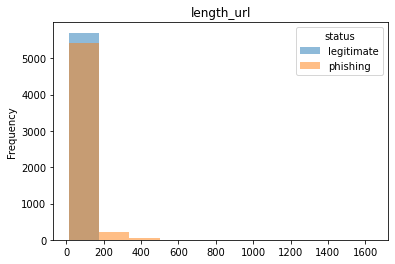

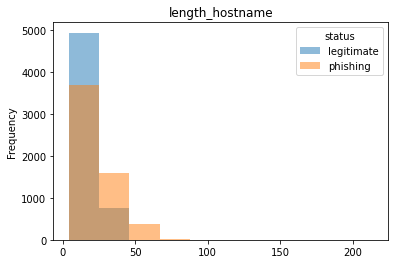

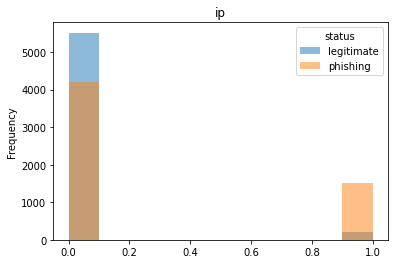

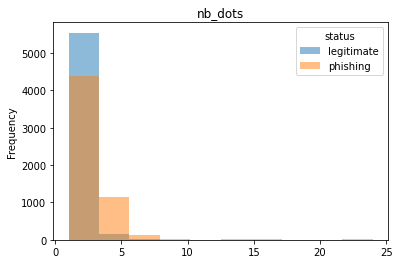

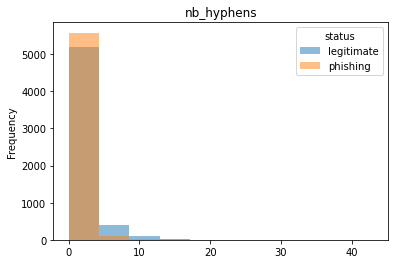

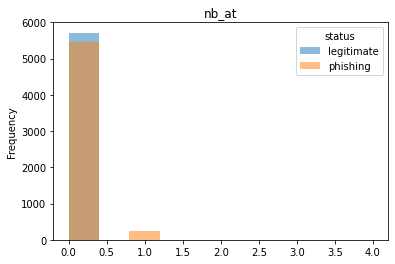

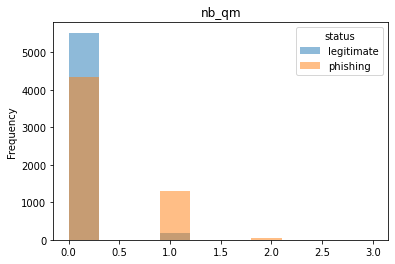

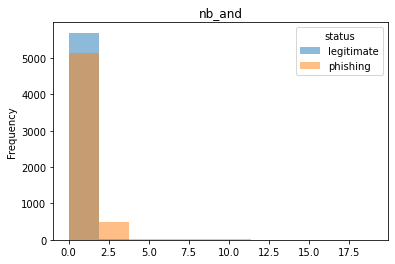

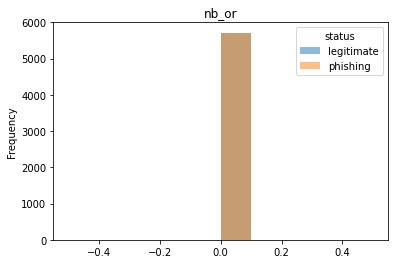

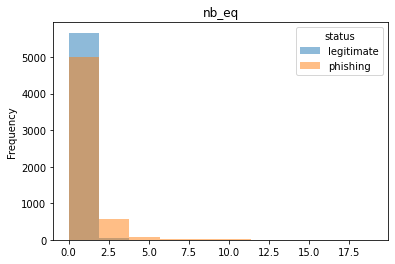

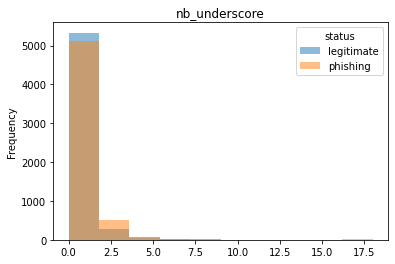

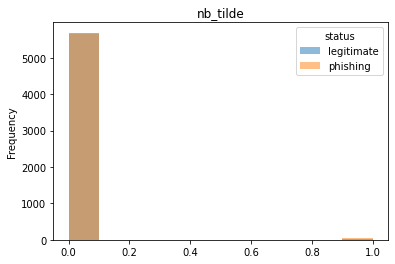

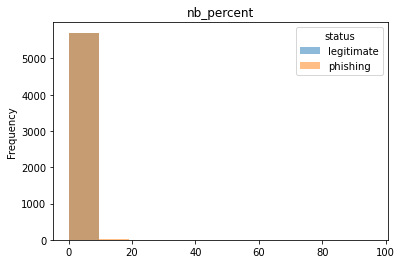

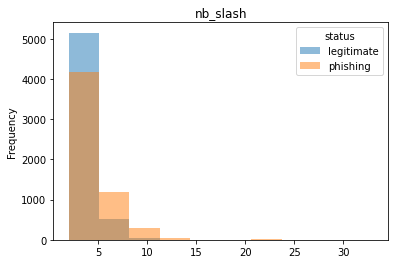

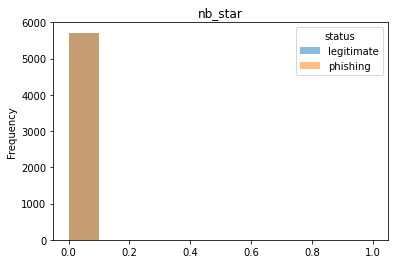

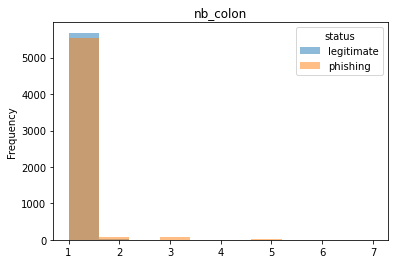

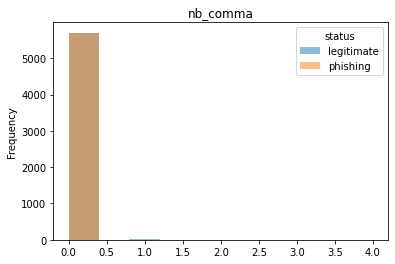

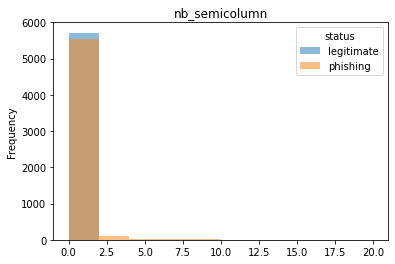

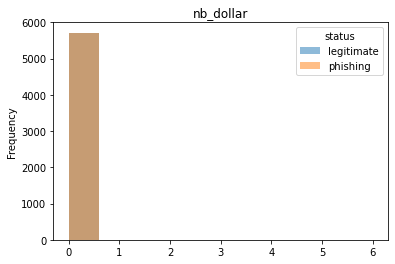

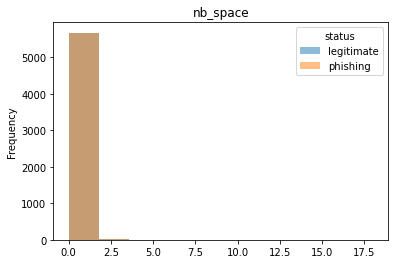

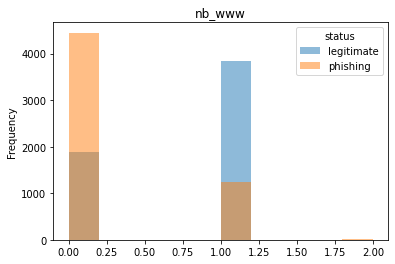

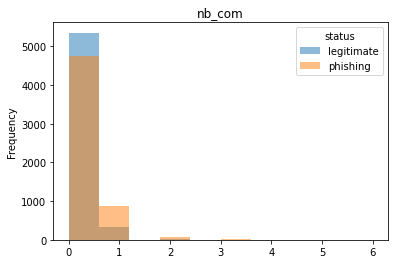

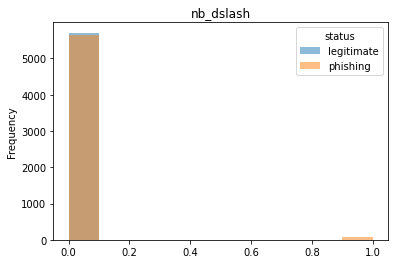

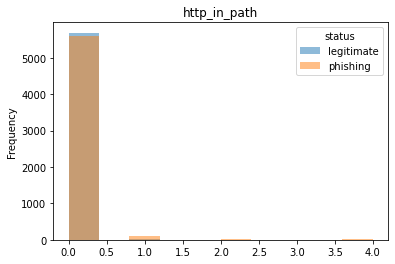

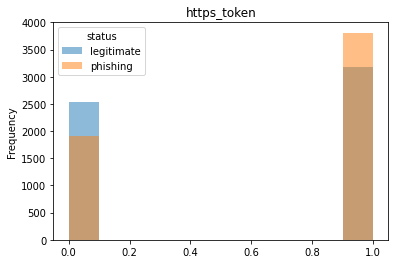

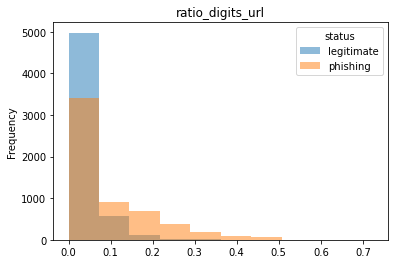

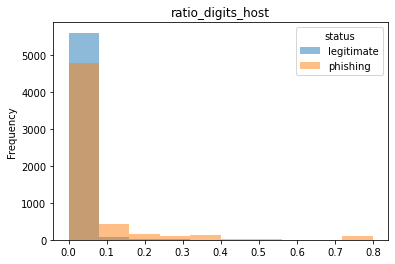

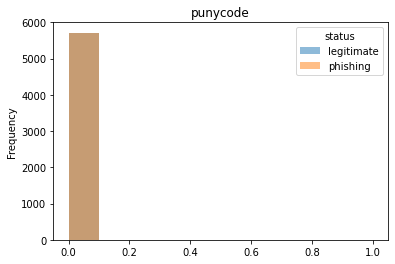

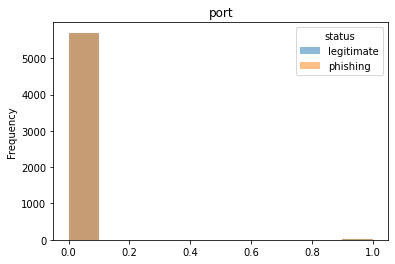

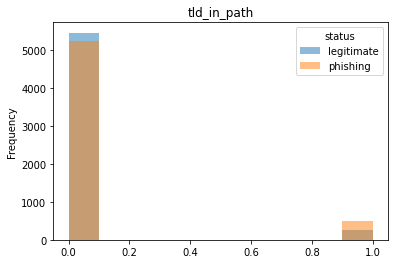

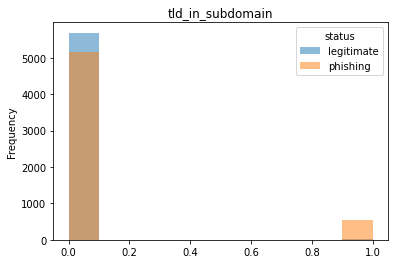

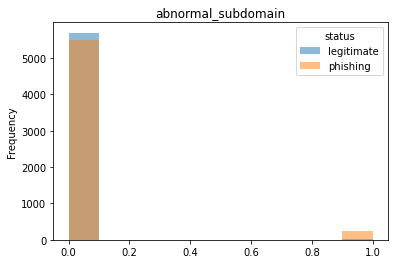

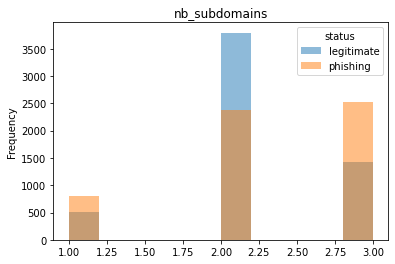

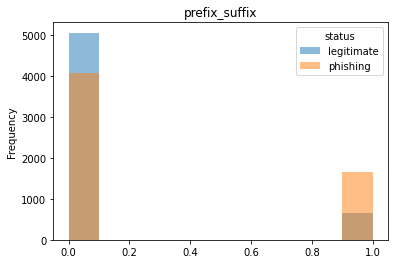

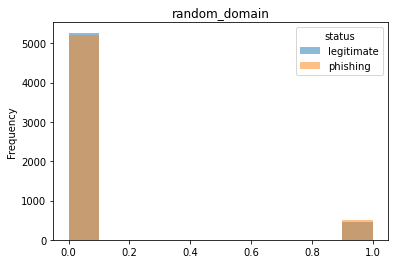

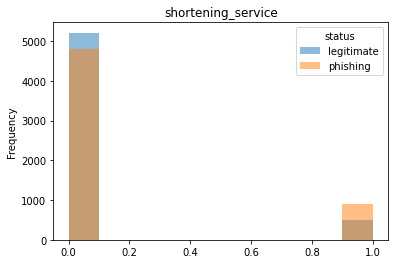

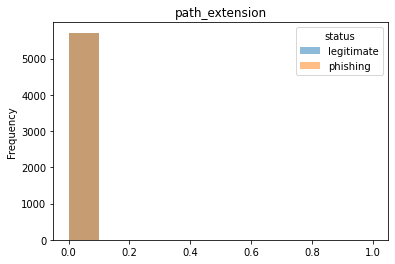

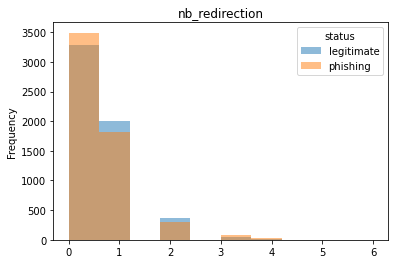

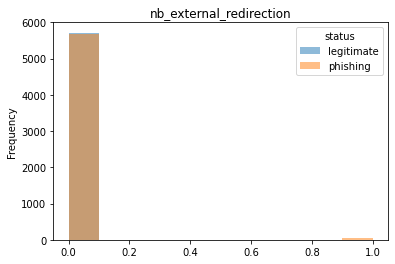

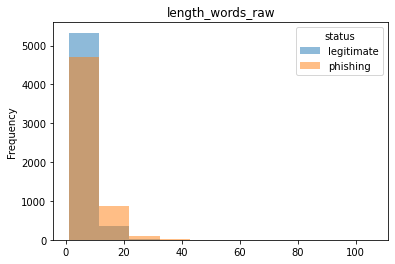

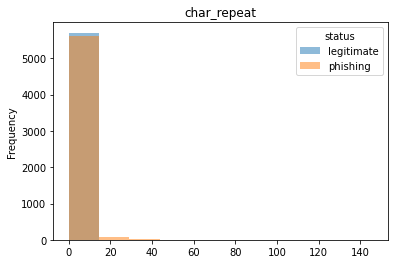

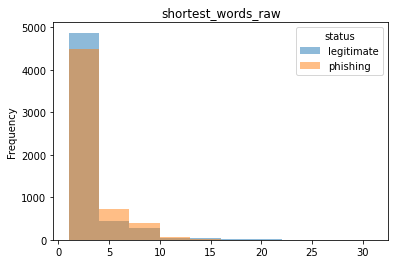

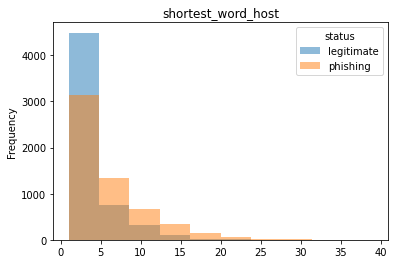

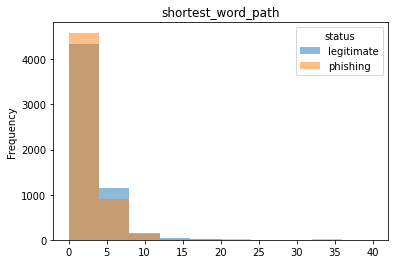

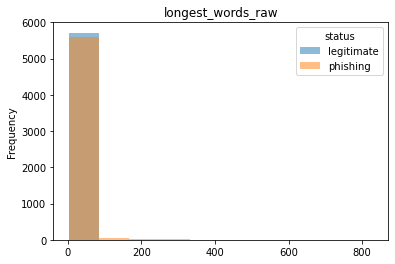

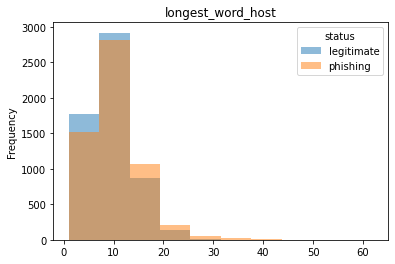

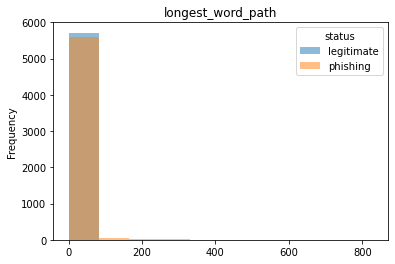

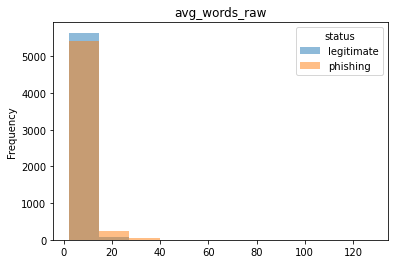

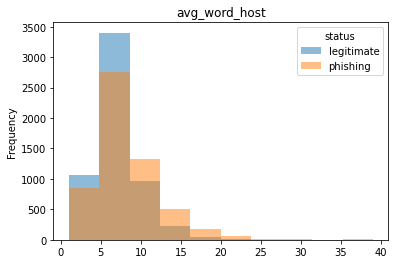

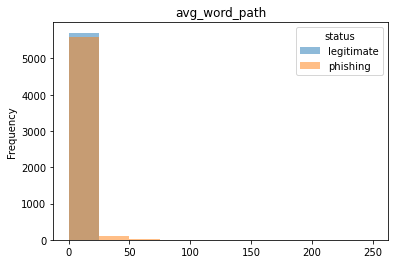

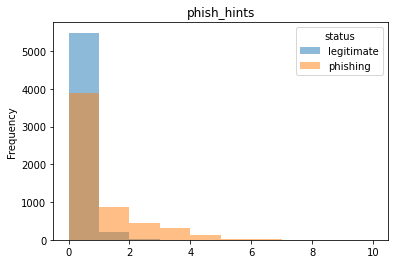

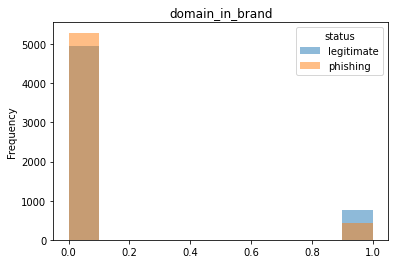

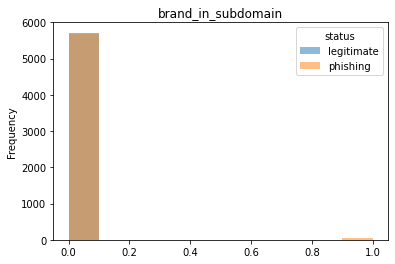

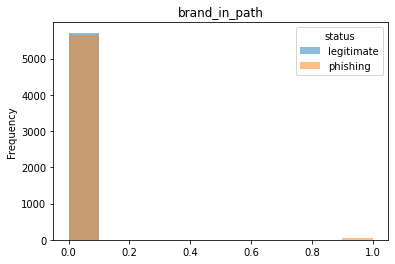

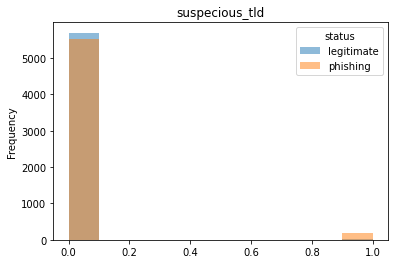

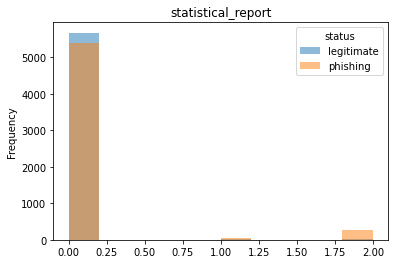

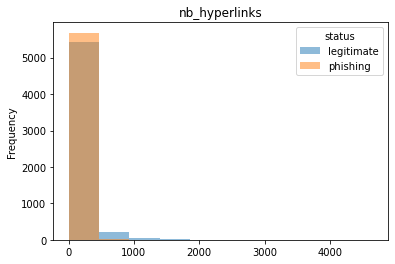

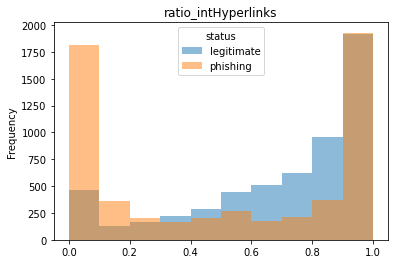

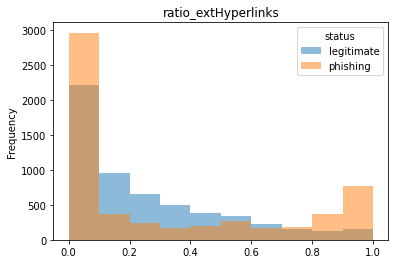

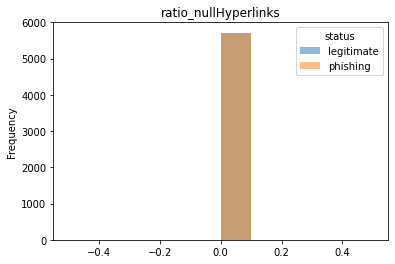

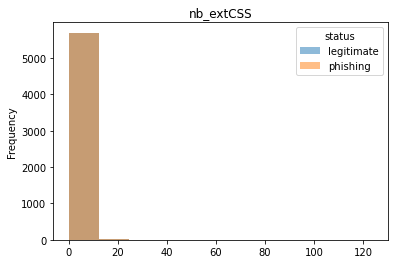

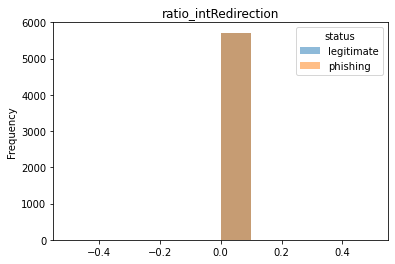

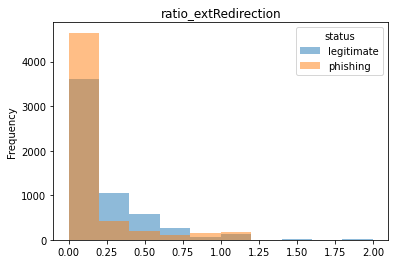

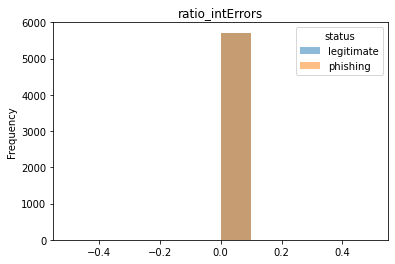

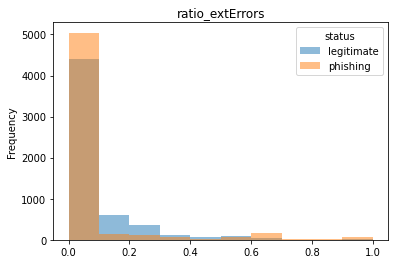

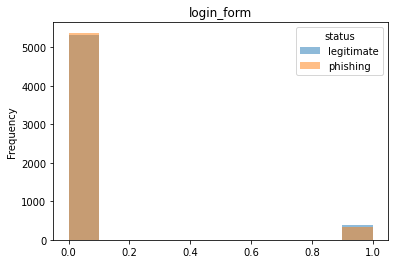

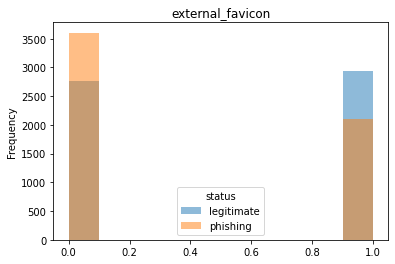

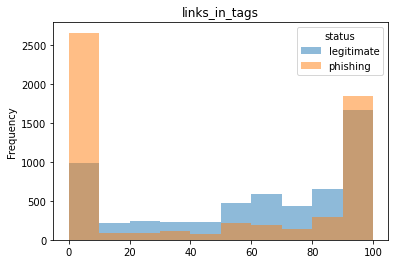

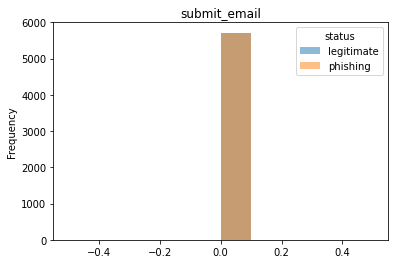

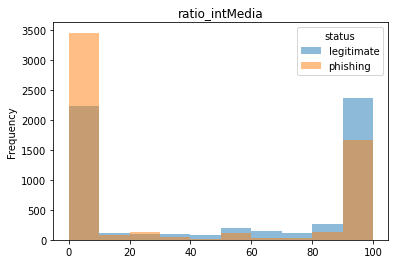

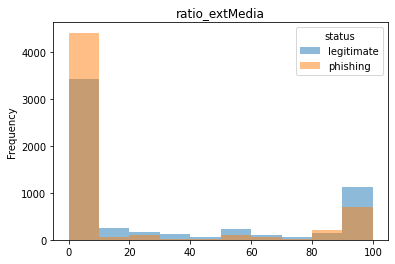

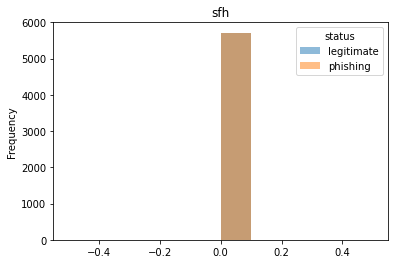

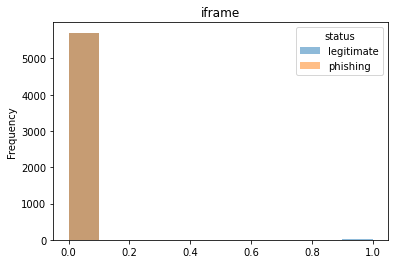

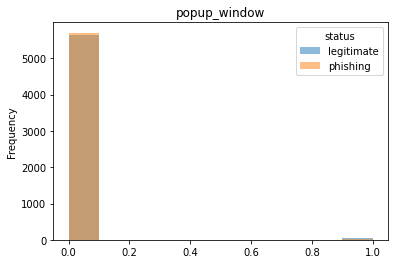

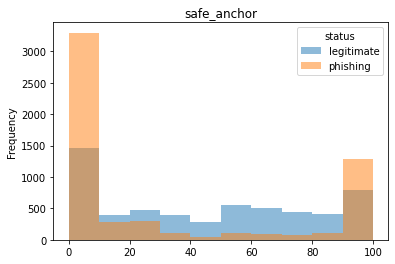

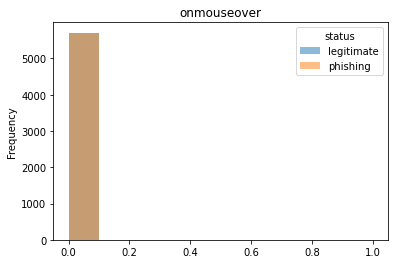

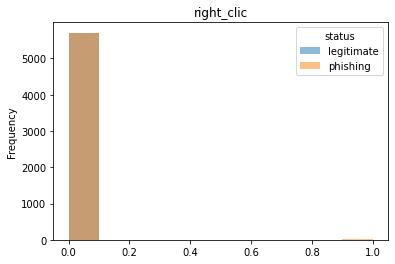

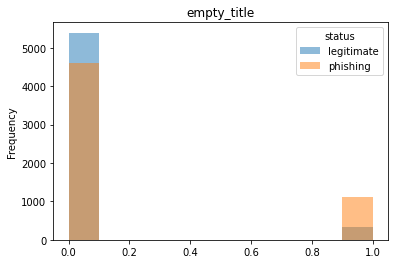

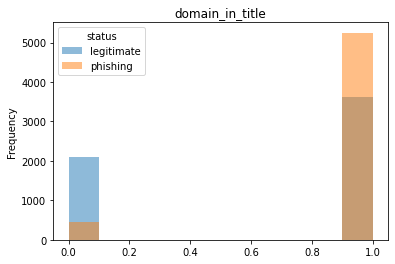

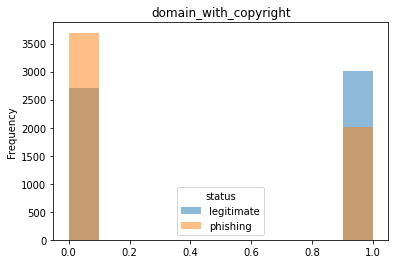

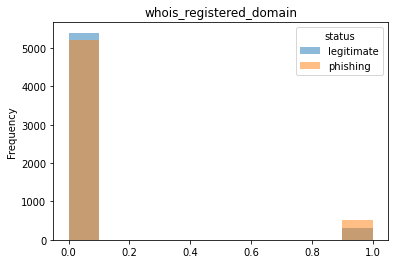

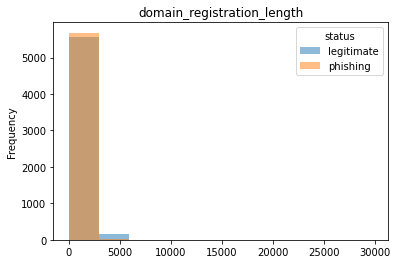

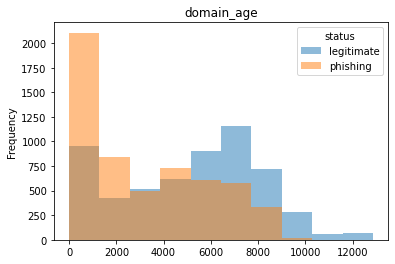

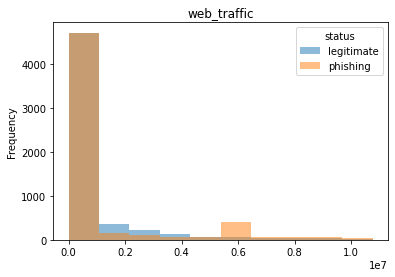

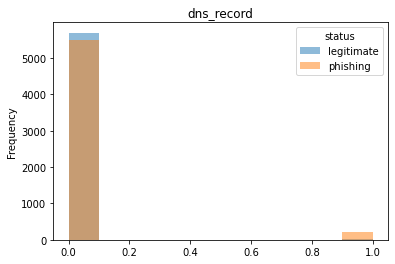

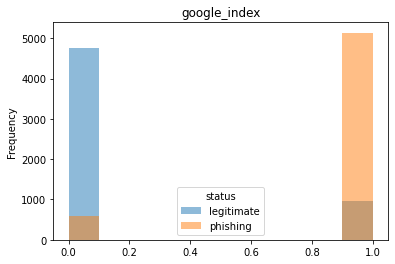

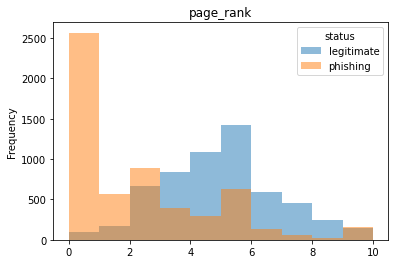

In [11]:
# Make histogram for every numeric features against status.
for column in df.select_dtypes("number").columns:
    df.pivot(columns="status")[column].plot.hist(alpha=0.5)
    plt.title(column)
    plt.show()

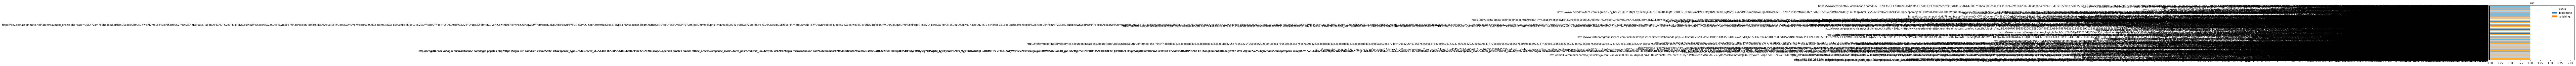

In [80]:
# # # Then, make bar plot for every categorical features against status.
# import matplotlib .pyplot as plt
# for column in df.select_dtypes("object").columns.drop("status"):
#     df.pivot(columns="status")[column].apply(pd.value_counts).plot.bar(stacked=True)
#     plt.title(column)
#     plt.show()

Feature Engineering and Selection

In [13]:
X = df.drop(columns=["status"])
y = df["status"]

In [14]:
scaler = StandardScaler()
X[X.select_dtypes("number").columns] = scaler.fit_transform(X.select_dtypes("number"))

In [15]:
ordEnc = OrdinalEncoder(dtype=np.int)
X[X.select_dtypes("object").columns] = ordEnc.fit_transform(X.select_dtypes("object"))
labEnc = LabelEncoder()
y = labEnc.fit_transform(y)

LogisticRegression

In [16]:
estimator = LogisticRegression(random_state=random_state)
rfecv = RFECV(estimator=estimator, cv=StratifiedKFold(10, random_state=random_state, shuffle=True), scoring="accuracy")
rfecv.fit(X, y)

RFECV(cv=StratifiedKFold(n_splits=10, random_state=123, shuffle=True),
      estimator=LogisticRegression(random_state=123), scoring='accuracy')

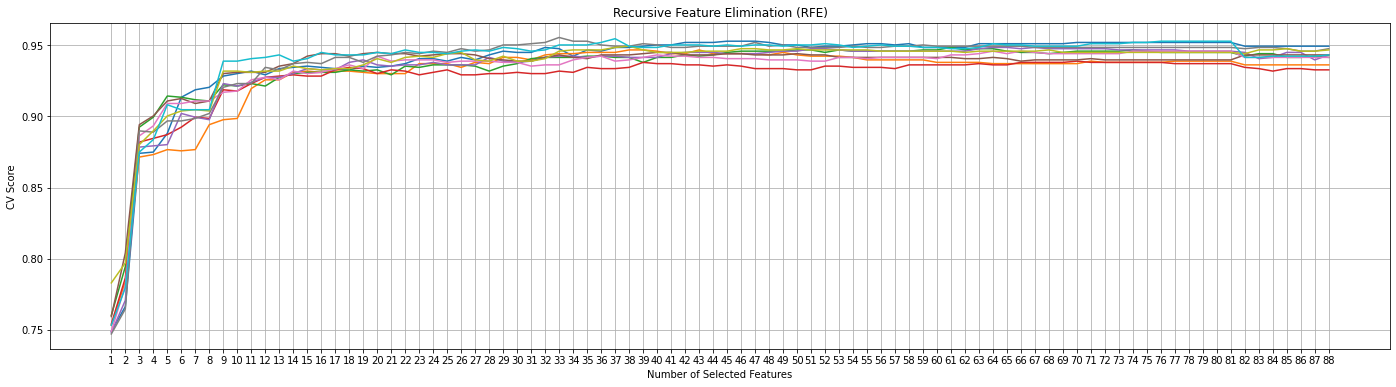

The optimal number of features: 47


In [17]:
plt.figure(figsize=(24, 6))
plt.plot(range(1, len(rfecv.grid_scores_)+1), rfecv.grid_scores_)
plt.grid()
plt.xticks(range(1, X.shape[1]+1))
plt.xlabel("Number of Selected Features")
plt.ylabel("CV Score")
plt.title("Recursive Feature Elimination (RFE)")
plt.show()

print("The optimal number of features: {}".format(rfecv.n_features_))

In [18]:
X_rfe = X.iloc[:, rfecv.support_]

In [19]:
print("\"X\" dimension: {}".format(X.shape))
print("\"X\" column list:", X.columns.tolist())
print("\"X_rfe\" dimension: {}".format(X_rfe.shape))
print("\"X_rfe\" column list:", X_rfe.columns.tolist())

"X" dimension: (11430, 88)
"X" column list: ['url', 'length_url', 'length_hostname', 'ip', 'nb_dots', 'nb_hyphens', 'nb_at', 'nb_qm', 'nb_and', 'nb_or', 'nb_eq', 'nb_underscore', 'nb_tilde', 'nb_percent', 'nb_slash', 'nb_star', 'nb_colon', 'nb_comma', 'nb_semicolumn', 'nb_dollar', 'nb_space', 'nb_www', 'nb_com', 'nb_dslash', 'http_in_path', 'https_token', 'ratio_digits_url', 'ratio_digits_host', 'punycode', 'port', 'tld_in_path', 'tld_in_subdomain', 'abnormal_subdomain', 'nb_subdomains', 'prefix_suffix', 'random_domain', 'shortening_service', 'path_extension', 'nb_redirection', 'nb_external_redirection', 'length_words_raw', 'char_repeat', 'shortest_words_raw', 'shortest_word_host', 'shortest_word_path', 'longest_words_raw', 'longest_word_host', 'longest_word_path', 'avg_words_raw', 'avg_word_host', 'avg_word_path', 'phish_hints', 'domain_in_brand', 'brand_in_subdomain', 'brand_in_path', 'suspecious_tld', 'statistical_report', 'nb_hyperlinks', 'ratio_intHyperlinks', 'ratio_extHyperlinks

Build Some ML Models

In [20]:
X_train, X_test, X_rfe_train, X_rfe_test, y_train, y_test = train_test_split(X, X_rfe, y, 
                                                                             train_size=0.8, 
                                                                             stratify=y,
                                                                             random_state=random_state)
print("Train size: {}".format(len(y_train)))
print("Test size: {}".format(len(y_test)))

Train size: 9144
Test size: 2286


In [21]:
clf_keys = ["Multi-layer Perceptron", "Logistic Regression"]
clf_values = [MLPClassifier(random_state=random_state, max_iter=1000), LogisticRegression(random_state=random_state)]
clf_rfe_keys = ["Multi-layer Perceptron", "Logistic Regression"]
clf_rfe_values = [MLPClassifier(random_state=random_state, max_iter=1000), LogisticRegression(random_state=random_state)]
clfs = dict(zip(clf_keys, clf_values))
clfs_rfe = dict(zip(clf_rfe_keys, clf_rfe_values))

# Original dataset
print("Model training using original data: started!")
for clf_name, clf in clfs.items():
    clf.fit(X_train, y_train)
    clfs[clf_name] = clf
    print(clf_name, "training: done!")
print("Model training using original data: done!\n")

# Feature-selected dataset
print("Model training using feature-selected data: started!")
for clf_rfe_name, clf_rfe in clfs_rfe.items():
    clf_rfe.fit(X_rfe_train, y_train)
    clfs_rfe[clf_rfe_name] = clf_rfe
    print(clf_rfe_name, "training: done!")
print("Model training using feature-selected data: done!")

Model training using original data: started!
Multi-layer Perceptron training: done!
Logistic Regression training: done!
Model training using original data: done!

Model training using feature-selected data: started!
Multi-layer Perceptron training: done!
Logistic Regression training: done!
Model training using feature-selected data: done!


Periksa keakuratan kedua model ini, untuk saat ini

In [22]:
# Original dataset
acc = []
for clf_name, clf in clfs.items():
    y_pred = clf.predict(X_test)
    acc.append(accuracy_score(y_test, y_pred))

# Feature selected dataset
acc_rfe = []
for clf_rfe_name, clf_rfe in clfs_rfe.items():
    y_rfe_pred = clf_rfe.predict(X_rfe_test)
    acc_rfe.append(accuracy_score(y_test, y_rfe_pred))
    
acc_all = pd.DataFrame({"Original dataset": acc, "Feature-selected dataset": acc_rfe},
                       index=clf_keys)
acc_all

,Original dataset,Feature-selected dataset
Multi-layer Perceptron,0.904199,0.952756
Logistic Regression,0.946632,0.951006


Buat plot batang dari semua hasil akurasi untuk memvisualisasikannya.

Accuracy
Original dataset            0.925416
Feature-selected dataset    0.951881


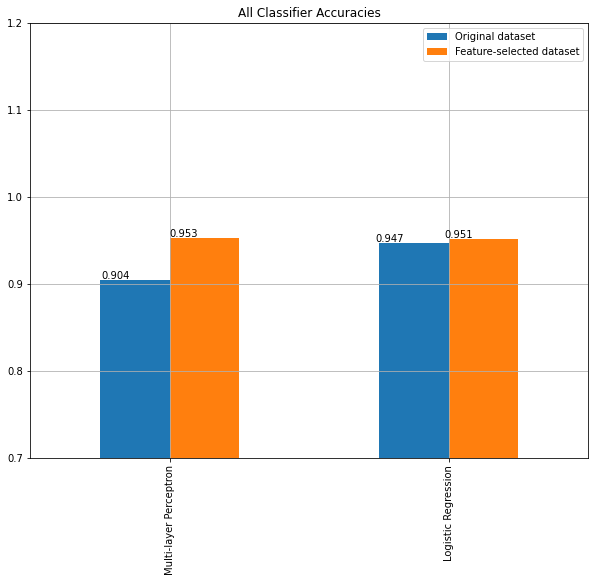

In [23]:
print("Accuracy\n" + acc_all.mean().to_string())

ax = acc_all.plot.bar(figsize=(10, 8))
for p in ax.patches:
    ax.annotate(str(p.get_height().round(3)), (p.get_x()*0.985, p.get_height()*1.002))
plt.ylim((0.7, 1.2))
plt.xticks(rotation=90)
plt.title("All Classifier Accuracies")
plt.grid()
plt.show()

Model Evaluation

Untuk memvalidasi hasil akurasi dan mengevaluasi kinerja kedua model ini lebih jauh, lakukan kipatgasi-validasi silang dengan k = 10k = 10 pada seluruh dataset. Metrik untuk memvalidasi adalah: akurasi, dan skor ROC AUC.

In [24]:
scoring = ["accuracy", "roc_auc"]

scores = []
# Original dataset
print("Cross-validation on original data: started!")
for clf_name, clf in clfs.items():
    score = pd.DataFrame(cross_validate(clf, X, y, cv=StratifiedKFold(10, random_state=random_state, shuffle=True), scoring=scoring)).mean()
    scores.append(score)
    print(clf_name, "cross-validation: done!")
cv_scores = pd.concat(scores, axis=1).rename(columns=dict(zip(range(len(clf_keys)), clf_keys)))
print("Cross-validation on original data: done!\n")

scores = []
# Feature-selected dataset
print("Cross-validation on feature-selected data: started!")
for clf_name, clf in clfs_rfe.items():
    score = pd.DataFrame(cross_validate(clf, X_rfe, y, cv=StratifiedKFold(10, random_state=random_state, shuffle=True), scoring=scoring)).mean()
    scores.append(score)
    print(clf_name, "cross-validation: done!")
cv_scores_rfe = pd.concat(scores, axis=1).rename(columns=dict(zip(range(len(clf_keys)), clf_keys)))
print("Cross-validation on feature-selected data: done!")

Cross-validation on original data: started!
Multi-layer Perceptron cross-validation: done!
Logistic Regression cross-validation: done!
Cross-validation on original data: done!

Cross-validation on feature-selected data: started!
Multi-layer Perceptron cross-validation: done!
Logistic Regression cross-validation: done!
Cross-validation on feature-selected data: done!


Cross-validation accuracy
Original data            0.933771
Feature-selected data    0.949738


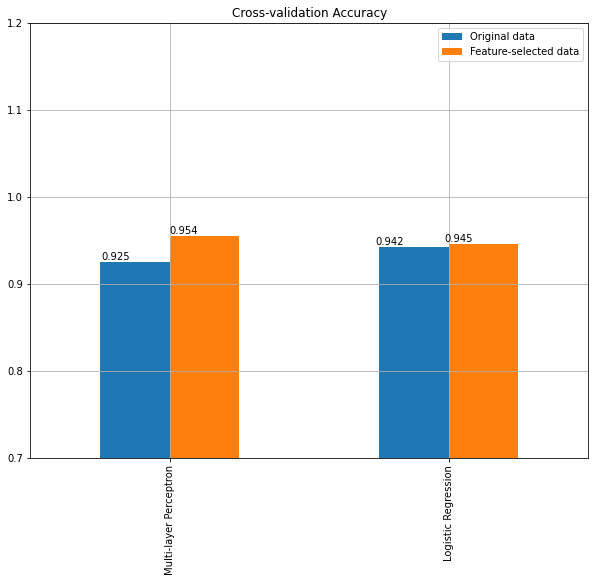

In [25]:
# Accuracy
cv_acc_all = pd.concat([cv_scores.loc["test_accuracy"].rename("Original data"), cv_scores_rfe.loc["test_accuracy"].rename("Feature-selected data")], 
                       axis=1)

print("Cross-validation accuracy\n" + cv_acc_all.mean().to_string())
ax = cv_acc_all.plot.bar(figsize=(10, 8))
for p in ax.patches:
    ax.annotate(str(p.get_height().round(3)), (p.get_x()*0.985, p.get_height()*1.003))
plt.xticks(rotation=90)
plt.ylim((0.7, 1.2))
plt.title("Cross-validation Accuracy")
plt.grid()
plt.legend()
plt.show()

Cross-validation ROC AUC score
Original data            0.983032
Feature-selected data    0.987423


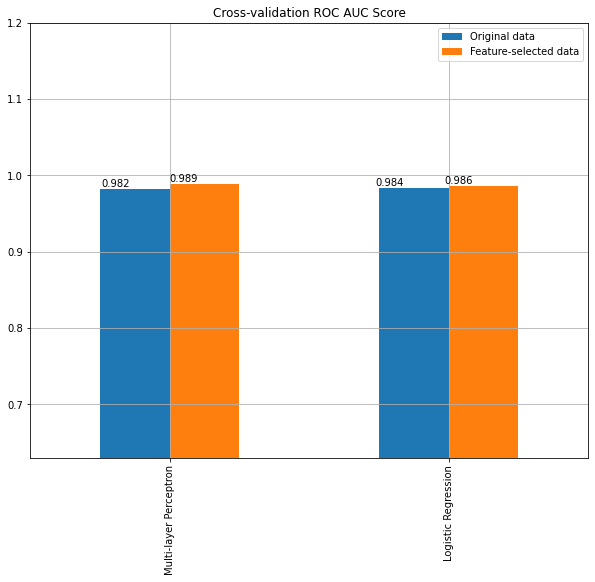

In [26]:
# ROC AUC
cv_roc_auc_all = pd.concat([cv_scores.loc["test_roc_auc"].rename("Original data"), cv_scores_rfe.loc["test_roc_auc"].rename("Feature-selected data")], 
                           axis=1)

print("Cross-validation ROC AUC score\n" + cv_roc_auc_all.mean().to_string())
ax = cv_roc_auc_all.plot.bar(figsize=(10, 8))
for p in ax.patches:
    ax.annotate(str(p.get_height().round(3)), (p.get_x()*0.985, p.get_height()*1.003))
plt.xticks(rotation=90)
plt.ylim((0.63, 1.2))
plt.title("Cross-validation ROC AUC Score")
plt.grid()
plt.legend()
plt.show()

Cross-validation fit time
Original data             1.575245
Feature-selected data    19.253929


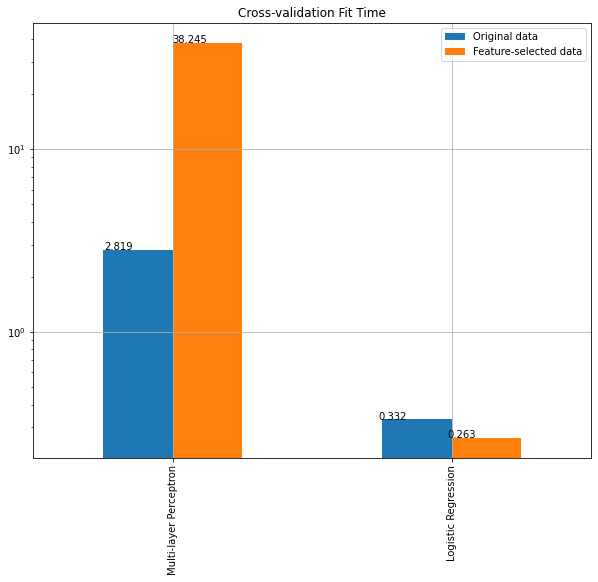

In [27]:
# Fit time
cv_fit_time_all = pd.concat([cv_scores.loc["fit_time"].rename("Original data"), cv_scores_rfe.loc["fit_time"].rename("Feature-selected data")], 
                           axis=1)

print("Cross-validation fit time\n" + cv_fit_time_all.mean().to_string())
ax = cv_fit_time_all.plot.bar(figsize=(10, 8))
for p in ax.patches:
    ax.annotate(str(p.get_height().round(3)), (p.get_x()*0.985, p.get_height()*1.003))
plt.xticks(rotation=90)
plt.yscale("log")
plt.title("Cross-validation Fit Time")
plt.grid()
plt.legend()
plt.show()

LR

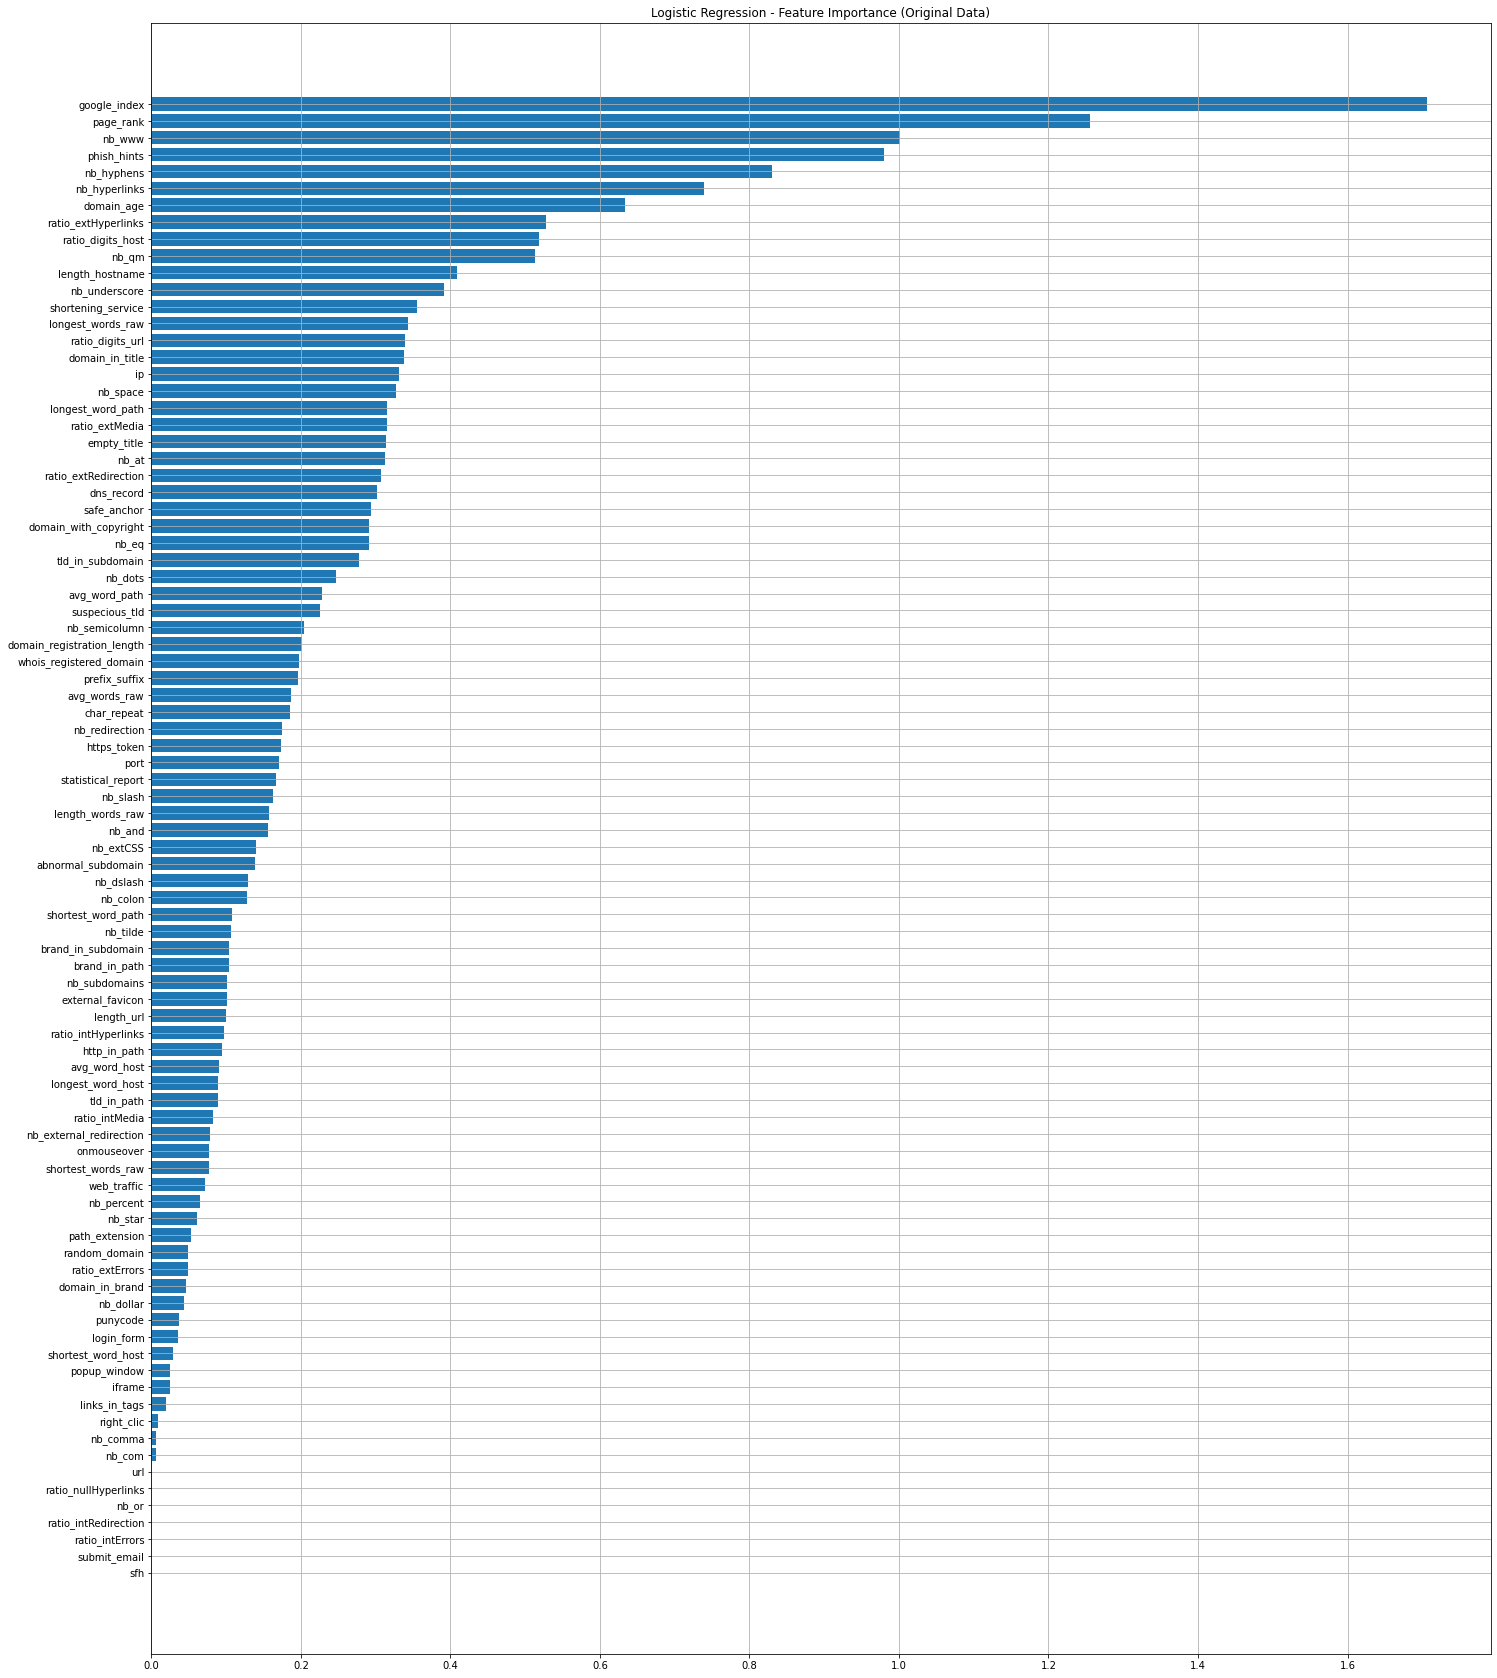

In [123]:
importance = abs(clfs["Logistic Regression"].coef_[0])
fig = plt.figure(figsize=(24, 30))
ax = fig.add_subplot()
ax.barh(X.columns.values[importance.argsort()], importance[importance.argsort()])
plt.title("Logistic Regression - Feature Importance (Original Data)")
ax.grid(True)
plt.show()


Feature Importance MultiLayer Perceptron

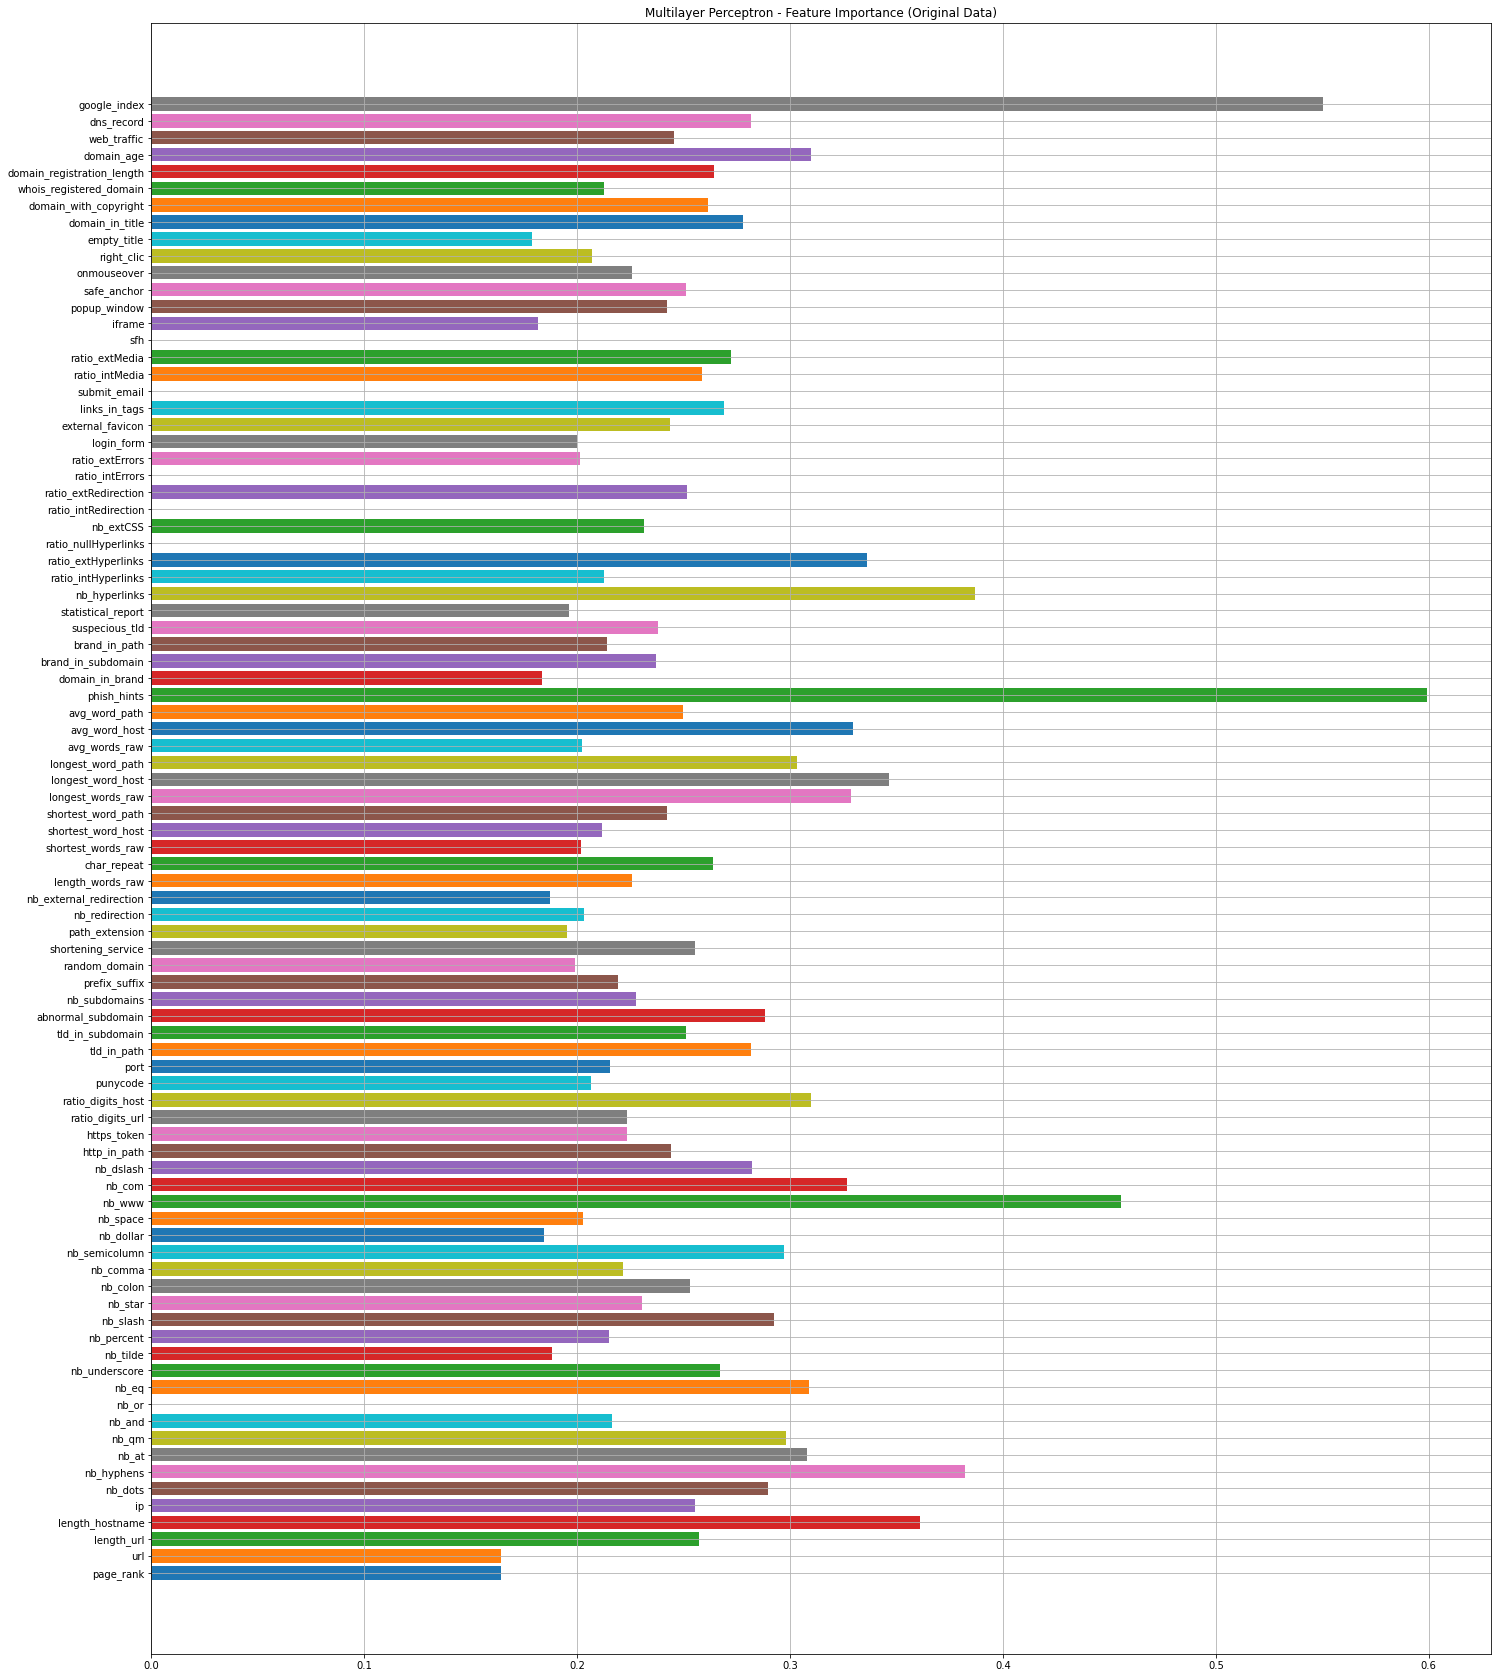

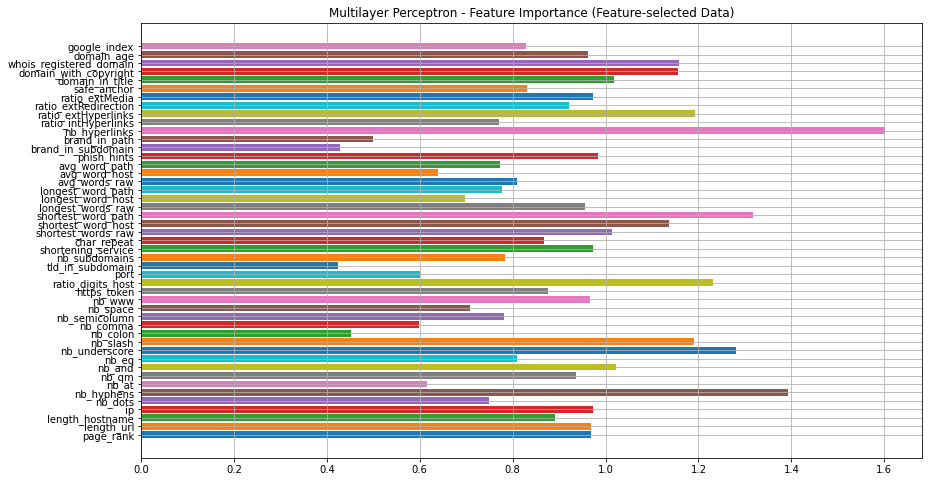

In [29]:
importance = abs(clfs["Multi-layer Perceptron"].coefs_[0])
len(importance)
fig = plt.figure(figsize=(24, 30))
plt.barh(X.columns.values[87], importance[0])
X_impt = [X.columns.values[87]]
for ab in range(87):
  plt.barh(X.columns.values[ab], importance[ab])

plt.title("Multilayer Perceptron - Feature Importance (Original Data)")
plt.grid()
plt.show()


importance_rfe = abs(clfs_rfe["Multi-layer Perceptron"].coefs_[0])
len(importance_rfe)
fig = plt.figure(figsize=(14, 8))
plt.barh(X_rfe.columns.values[46], importance_rfe[0])


X_rfe2 = [X_rfe.columns.values[46]]
for x in range(46):
  plt.barh(X_rfe.columns.values[x], importance_rfe[x])
  
plt.title("Multilayer Perceptron - Feature Importance (Feature-selected Data)")
plt.grid()
plt.show()

ranking RFE and MLP

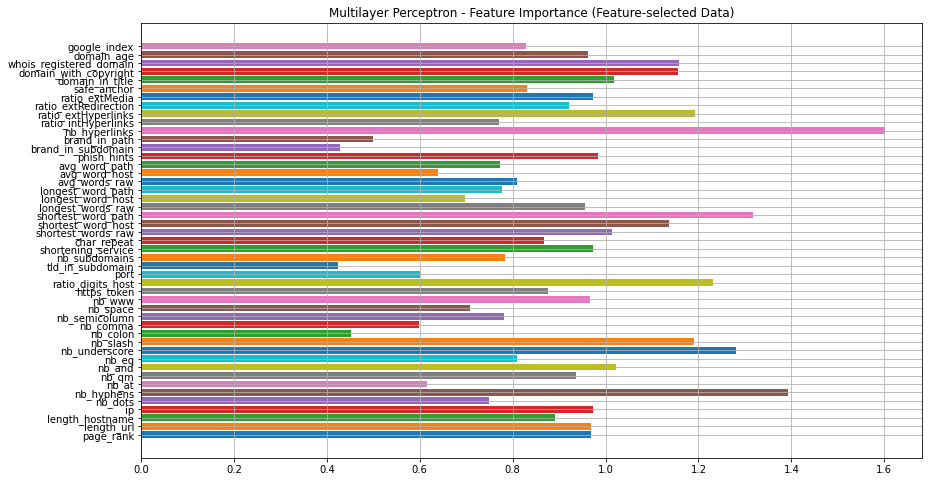

,url,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,...,empty_title,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank
0,4501,-0.436327,-0.193964,-0.421020,0.379116,-0.477984,-0.142915,-0.387464,-0.197604,0.0,...,-0.377549,-1.860473,1.129194,-0.28037,-0.549299,-1.307594,-0.429340,6.978227,0.934264,0.320974
1,3063,0.287067,0.177207,2.375182,-1.081136,-0.477984,-0.142915,-0.387464,-0.197604,0.0,...,-0.377549,0.537498,-0.885587,-0.28037,-0.510022,0.548471,-0.429340,-0.143303,0.934264,-0.467407
2,8984,1.173224,2.682613,2.375182,1.109242,0.001174,-0.142915,2.356473,2.237556,0.0,...,-0.377549,0.537498,-0.885587,-0.28037,-0.587348,-0.018839,2.491612,-0.143303,0.934264,-1.255788
3,2778,-0.779940,-0.936306,-0.421020,-0.351010,-0.477984,-0.142915,-0.387464,-0.197604,0.0,...,-0.377549,0.537498,-0.885587,-0.28037,-0.528433,-1.307594,-0.375359,-0.143303,-1.070361,-0.073217
4,5261,-0.110800,-0.565135,-0.421020,-0.351010,0.480332,-0.142915,-0.387464,-0.197604,0.0,...,-0.377549,-1.860473,1.129194,-0.28037,-0.329595,1.323334,-0.424968,-0.143303,-1.070361,1.109355
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11425,4876,-0.291649,-0.379549,-0.421020,-0.351010,-0.477984,-0.142915,-0.387464,-0.197604,0.0,...,-0.377549,-1.860473,-0.885587,-0.28037,-0.054659,0.429088,-0.427346,-0.143303,-1.070361,1.109355
11426,4285,0.413661,-0.286757,-0.421020,1.839369,-0.477984,6.288241,2.356473,-0.197604,0.0,...,-0.377549,0.537498,-0.885587,-0.28037,-0.345551,0.857708,-0.429340,-0.143303,0.934264,-1.255788
11427,9916,0.793442,-0.472342,2.375182,-0.351010,2.396963,-0.142915,2.356473,-0.197604,0.0,...,-0.377549,-1.860473,-0.885587,-0.28037,2.843221,1.432741,-0.429336,-0.143303,0.934264,2.686117
11428,5705,-0.418243,0.826757,-0.421020,-0.351010,-0.477984,-0.142915,-0.387464,-0.197604,0.0,...,-0.377549,0.537498,-0.885587,-0.28037,-0.500203,-0.394685,0.801163,-0.143303,-1.070361,0.320974


In [124]:
importance_rfe = abs(clfs_rfe["Multi-layer Perceptron"].coefs_[0])
len(importance_rfe)
fig = plt.figure(figsize=(14, 8))
plt.barh(X_rfe.columns.values[46], importance_rfe[0])


X_rfe2 = [X_rfe.columns.values[46]]
for x in range(46):
  plt.barh(X_rfe.columns.values[x], importance_rfe[x])
  
plt.title("Multilayer Perceptron - Feature Importance (Feature-selected Data)")
plt.grid()
plt.show()

X
